# Analyse correlations between PlanetScope and Sentinel-2

Load and analyse correlation coefficients between PlanetScope and Sentinel-2 regarding the following variables:

* Planet satellite
* Land use
* Area

## Prepare libraries and plotting environment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Plot inline
%matplotlib inline
# Define figure size
plt.rcParams['figure.figsize'] = (10, 8)

## Load data

In [3]:
# Correlations files
coor_fn_list = {
    1: "./data/Izola_coeff.csv",
    2: "./data/Jesenice_coeff.csv",
    3: "./data/Kranj_coeff.csv",
    4: "./data/Radenci_coeff.csv",
}

# Aggregated filename
corr_df_fn = "./data/corr_df.csv"

In [4]:
# Load all files
li = []
for area in coor_fn_list.keys():
    df = pd.read_csv(
        coor_fn_list[area],
        index_col=0,
        dtype={"band": "int"},
        parse_dates=["PS_Date", "S2_Date"],
    )
    df["Area"] = area
    li.append(df)
corr_df = pd.concat(li, axis=0, ignore_index=True)

In [5]:
corr_df.head()

,PS_filename,PS_Date,S2_filename,S2_Date,band,perc_valid,m,b,Area
0,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,0,0.494453,0.000062,-0.108939,1
1,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,1,0.494453,0.000072,-0.102311,1
2,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,2,0.494453,0.000072,-0.063634,1
3,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,3,0.494453,0.000091,-0.010202,1
4,I5_20170313_0e14_analytic_mosaic.tif,2017-03-13,20170312T100021_S2A_MSIL2A_20170312T100706_C12...,2017-03-12,0,0.807692,0.000036,-0.066416,1


In [6]:
corr_df.dtypes

PS_filename            object
PS_Date        datetime64[ns]
S2_filename            object
S2_Date        datetime64[ns]
band                    int32
perc_valid            float64
m                     float64
b                     float64
Area                    int64
dtype: object

In [7]:
# Split PS_filename at _ and create new column PS_Sat from the second part
corr_df["PS_Sat"] = corr_df["PS_filename"].str.split("_").str[2]
corr_df["PS_Sat"] = corr_df["PS_Sat"].astype("category")

In [8]:
corr_df.head()

,PS_filename,PS_Date,S2_filename,S2_Date,band,perc_valid,m,b,Area,PS_Sat
0,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,0,0.494453,0.000062,-0.108939,1,0e30
1,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,1,0.494453,0.000072,-0.102311,1,0e30
2,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,2,0.494453,0.000072,-0.063634,1,0e30
3,I5_20170124_0e30_analytic_mosaic.tif,2017-01-24,20170124T101311_S2A_MSIL2A_20170124T101407_W02...,2017-01-24,3,0.494453,0.000091,-0.010202,1,0e30
4,I5_20170313_0e14_analytic_mosaic.tif,2017-03-13,20170312T100021_S2A_MSIL2A_20170312T100706_C12...,2017-03-12,0,0.807692,0.000036,-0.066416,1,0e14


In [9]:
# Save dataframe
corr_df.to_csv(corr_df_fn)

## Correlation analysis

Use only selected columns for analysis.

In [10]:
# Use only Area, PS_Date, band, PS_sat, and m
corr_sub_df = corr_df[["Area", "PS_Date", "band", "PS_Sat", "m"]]

In [11]:
corr_sub_df.head()

,Area,PS_Date,band,PS_Sat,m
0,1,2017-01-24,0,0e30,0.000062
1,1,2017-01-24,1,0e30,0.000072
2,1,2017-01-24,2,0e30,0.000072
3,1,2017-01-24,3,0e30,0.000091
4,1,2017-03-13,0,0e14,0.000036


### Plot correlation coefficients by time and band

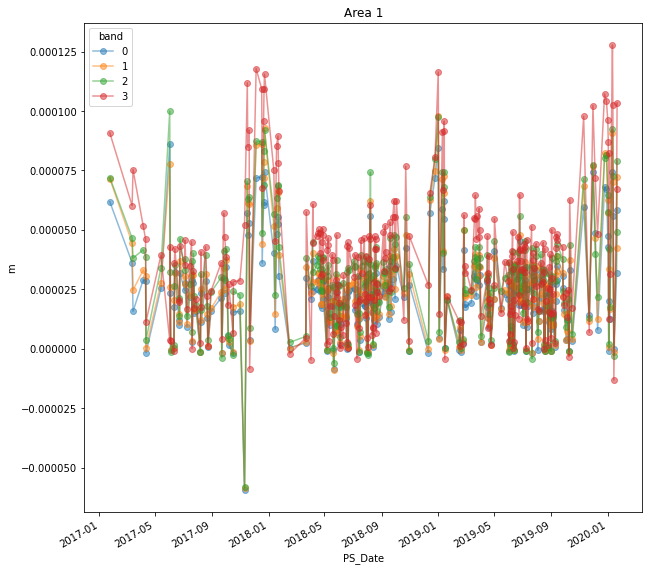

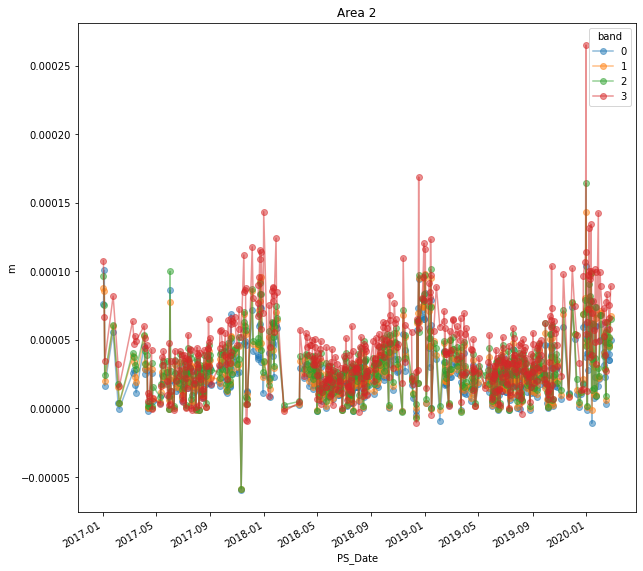

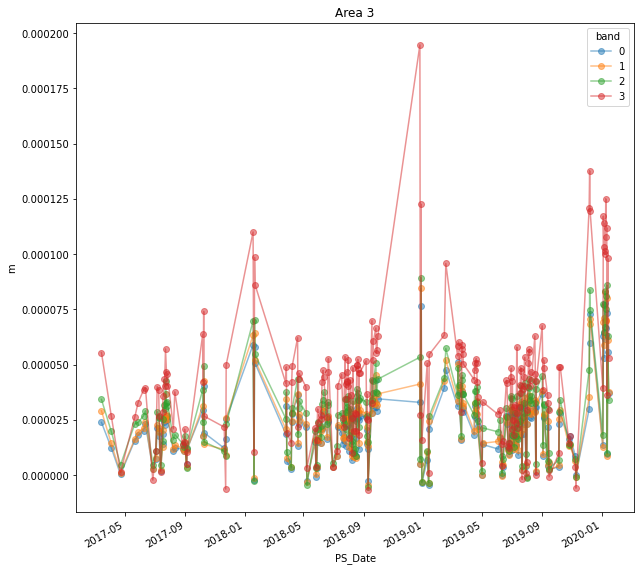

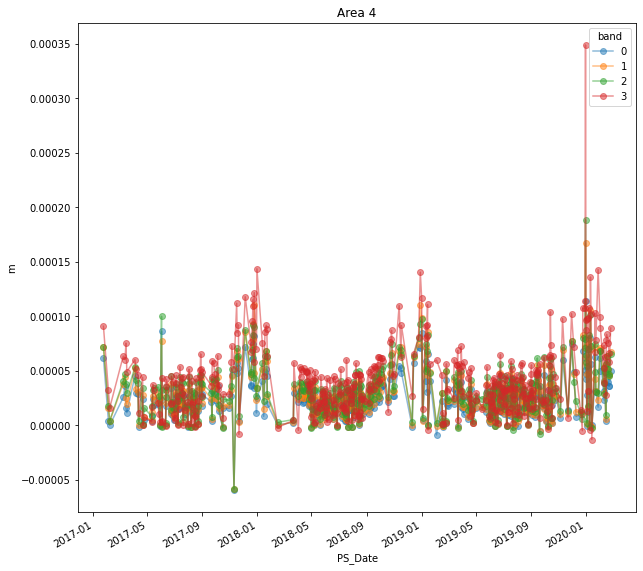

In [14]:
# Plot PS_Date vs m, for each area and band
for area in np.unique(corr_sub_df["Area"]):
    # Get df for area, drop area column
    area_df = corr_sub_df.loc[corr_sub_df["Area"] == area, :].drop(
        columns=["Area"]
    )
    # Convert to wide
    df = pd.pivot_table(area_df,index=['PS_Date'], columns = 'band', values = "m")
    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    df.plot(ax=ax, alpha=0.5, marker='o')
    ax.set_title(f"Area {area}")
    ax.set_xlabel("PS_Date")
    ax.set_ylabel("m")

### Mean m by band

In [21]:
corr_sub_df.head()

,Area,PS_Date,band,PS_Sat,m
0,1,2017-01-24,0,0e30,0.000062
1,1,2017-01-24,1,0e30,0.000072
2,1,2017-01-24,2,0e30,0.000072
3,1,2017-01-24,3,0e30,0.000091
4,1,2017-03-13,0,0e14,0.000036


In [22]:
# Compute mean m by band, ignore Area
mean_m_by_band = corr_sub_df.groupby("band").mean()

In [23]:
# Drop Area column
mean_m_by_band = mean_m_by_band.drop(columns=["Area"])

In [24]:
mean_m_by_band.head()

,m
band,
0,0.000023
1,0.000026
2,0.000030
3,0.000039


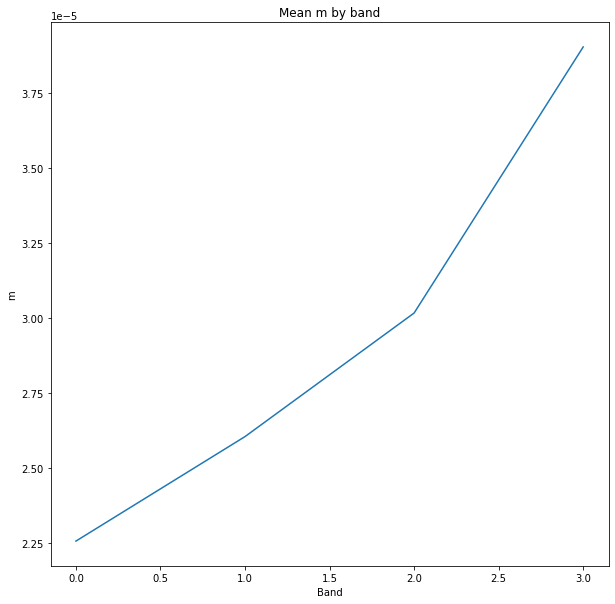

In [25]:
# Plot mean m by band
fig, ax = plt.subplots(figsize=(10, 10))
mean_m_by_band.plot(ax=ax)
ax.set_title("Mean m by band")
ax.set_xlabel("Band")
ax.set_ylabel("m")
# No legend
ax.legend().set_visible(False)

In [27]:
data = []
# Iterate over bands in corr_sub_df
for band in np.unique(corr_sub_df["band"]):
    # Get df for band, drop band column
    band_df = corr_sub_df.loc[corr_sub_df["band"] == band, :]['m']
    data.append(band_df)

In [28]:
data

[0        0.000062
 4        0.000036
 8        0.000016
 12       0.000029
 16       0.000028
            ...   
 10668    0.000039
 10672    0.000036
 10676    0.000036
 10680    0.000035
 10684    0.000064
 Name: m, Length: 2672, dtype: float64,
 1        0.000072
 5        0.000044
 9        0.000025
 13       0.000033
 17       0.000031
            ...   
 10669    0.000051
 10673    0.000046
 10677    0.000046
 10681    0.000049
 10685    0.000085
 Name: m, Length: 2672, dtype: float64,
 2        0.000072
 6        0.000047
 10       0.000038
 14       0.000042
 18       0.000039
            ...   
 10670    0.000052
 10674    0.000047
 10678    0.000045
 10682    0.000049
 10686    0.000081
 Name: m, Length: 2672, dtype: float64,
 3        0.000091
 7        0.000060
 11       0.000075
 15       0.000051
 19       0.000046
            ...   
 10671    0.000076
 10675    0.000066
 10679    0.000058
 10683    0.000070
 10687    0.000109
 Name: m, Length: 2672, dtype: float64]

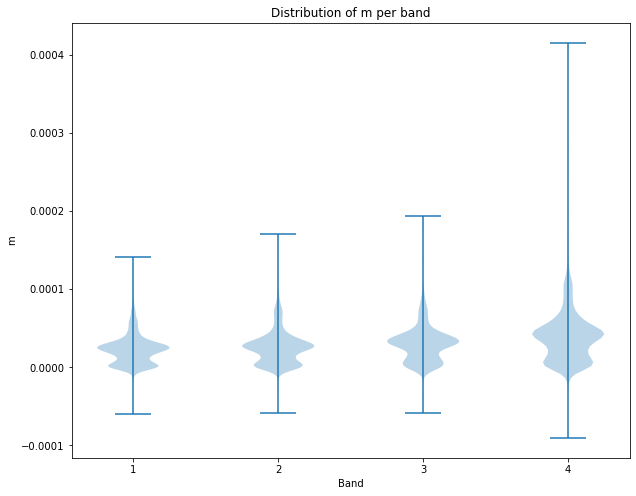

In [33]:
# Violin plot
fig, axes = plt.subplots()
axes.violinplot(dataset = data)
axes.set_title("Distribution of m per band")
axes.set_xlabel("Band")
axes.set_ylabel("m")
plt.xticks([1, 2, 3, 4])
plt.show()

### Statistics of m by area and band

In [36]:
corr_sub_df.head()

,Area,PS_Date,band,PS_Sat,m
0,1,2017-01-24,0,0e30,0.000062
1,1,2017-01-24,1,0e30,0.000072
2,1,2017-01-24,2,0e30,0.000072
3,1,2017-01-24,3,0e30,0.000091
4,1,2017-03-13,0,0e14,0.000036


In [37]:
# Compute mean m by area and band
mean_m_by_area_band = corr_sub_df.groupby(["band", "Area"]).mean()

In [38]:
mean_m_by_area_band.head()

m
band Area          
0    1     0.000021
     2     0.000023
     3     0.000023
     4     0.000022
1    1     0.000024

In [39]:
# To wide
mean_m_by_area_band_wide = mean_m_by_area_band.unstack()

In [40]:
mean_m_by_area_band_wide.head()

m                              
Area         1         2         3         4
band                                        
0     0.000021  0.000023  0.000023  0.000022
1     0.000024  0.000027  0.000024  0.000026
2     0.000029  0.000031  0.000028  0.000030
3     0.000035  0.000040  0.000041  0.000039

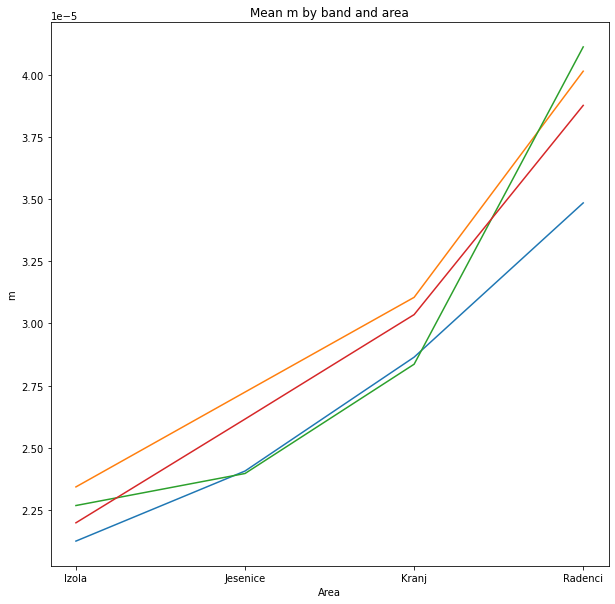

In [41]:
# Plot mean m by band
fig, ax = plt.subplots(figsize=(10, 10))
mean_m_by_area_band_wide.plot(ax=ax)
ax.set_title("Mean m by band and area")
ax.set_xlabel("Area")
ax.set_ylabel("m")
plt.xticks([0, 1, 2, 3], ["Izola", "Jesenice", "Kranj", "Radenci"])
# No legend
ax.legend().set_visible(False)

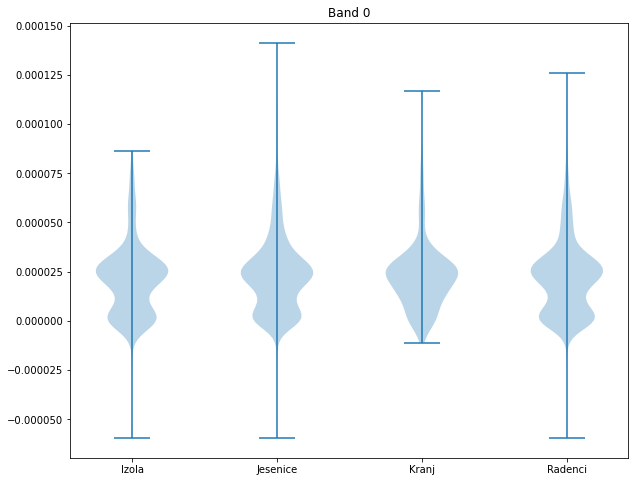

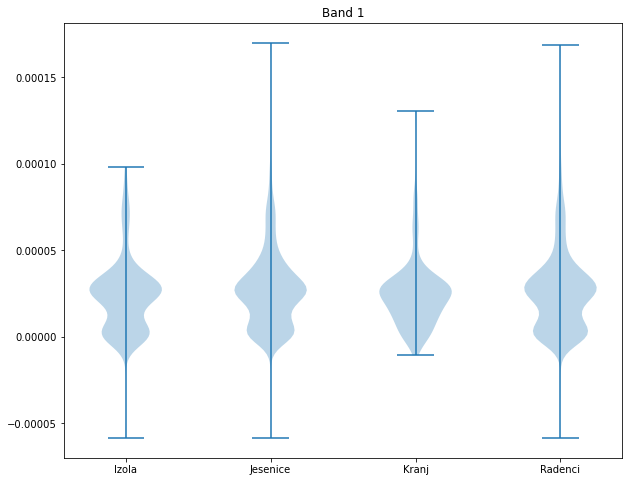

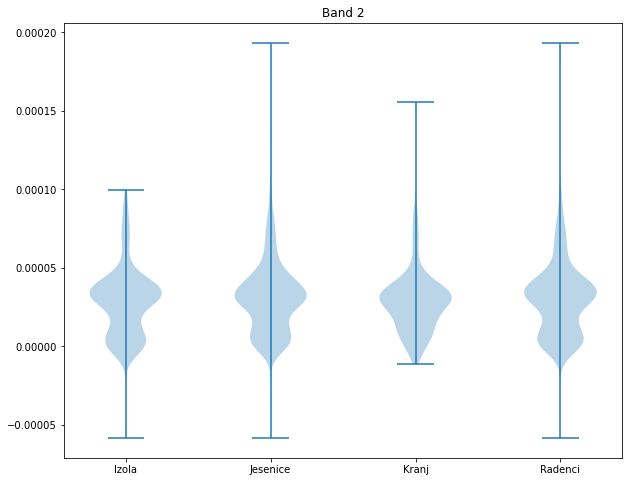

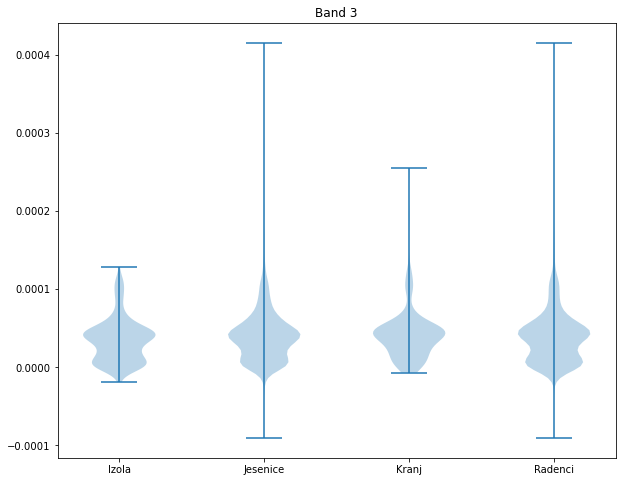

In [54]:
# Iterate over bands in corr_sub_df
for band in np.unique(corr_sub_df["band"]):
    # Get df for band, drop band column
    band_df = corr_sub_df.loc[corr_sub_df["band"] == band, :].drop(
        columns=["band"]
    )
    data = []
    for area in np.unique(corr_sub_df["Area"]):
        # Get df for area, drop area column
        area_df = band_df.loc[corr_sub_df["Area"] == area, :]['m']
        data.append(area_df)
    fig, axes = plt.subplots()
    axes.violinplot(dataset = data)
    plt.xticks([1, 2, 3, 4], ["Izola", "Jesenice", "Kranj", "Radenci"])
    plt.title(f"Band {band}")
    plt.show()